<a href="https://colab.research.google.com/github/srigokulavishnu/MLlab/blob/main/NonLinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

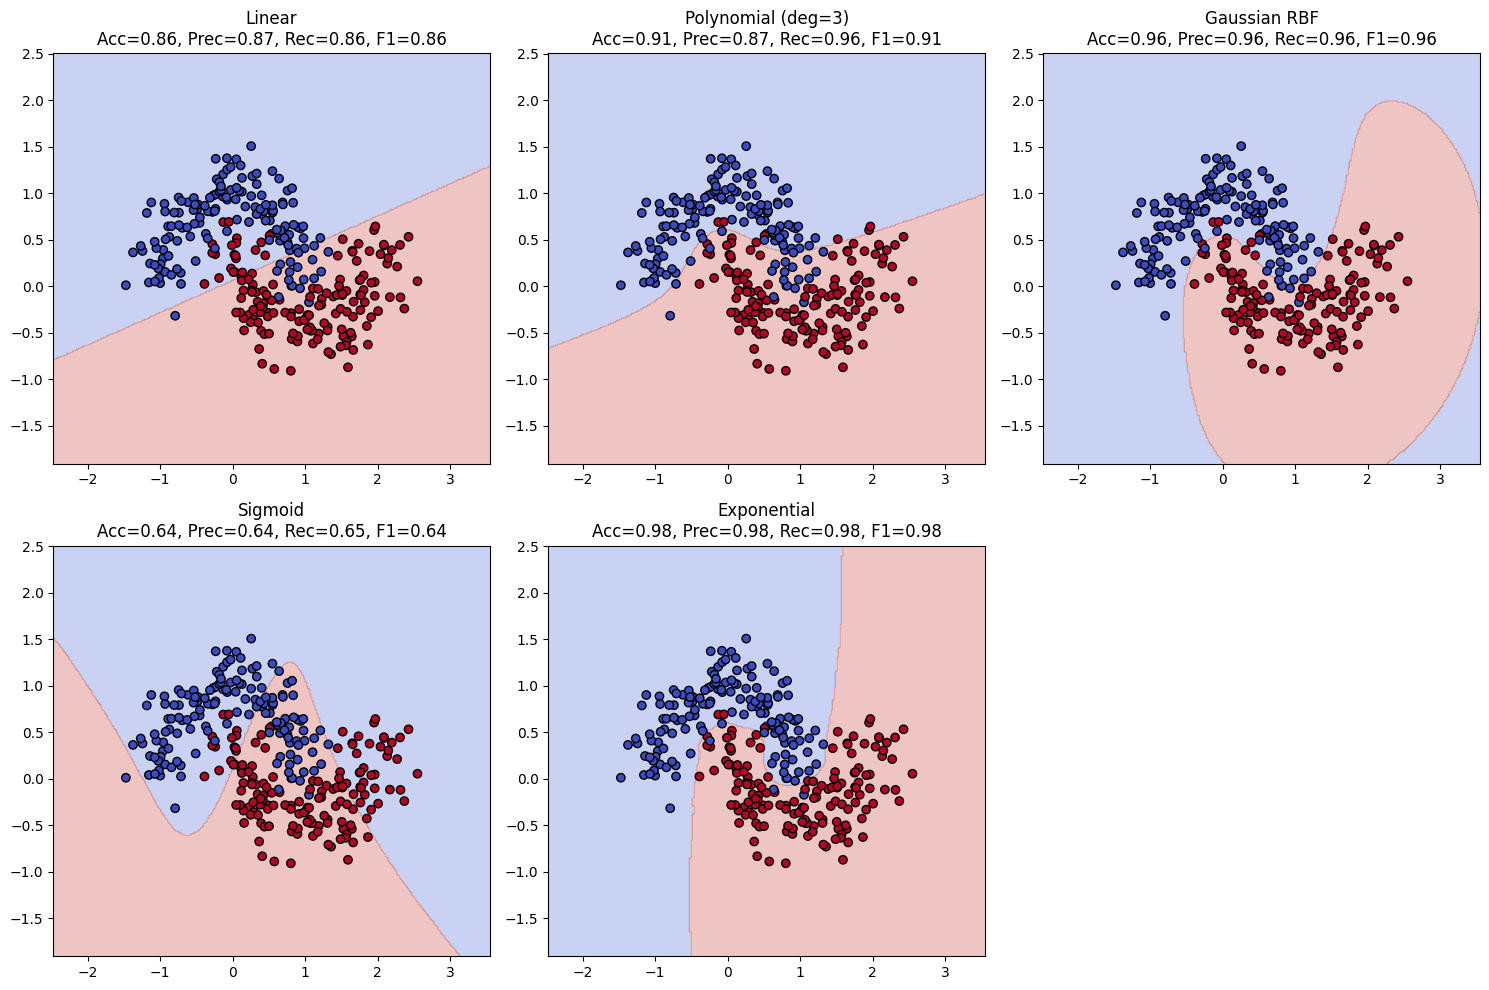

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import pairwise_kernels

# Generate non-linear dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# ---------- Kernel Functions ---------- #

def svm_linear(X, y, C=1):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    return clf

def svm_polynomial(X, y, degree=3, C=1):
    clf = SVC(kernel='poly', degree=degree, C=C, gamma='scale')
    clf.fit(X, y)
    return clf

def svm_rbf(X, y, C=1):
    clf = SVC(kernel='rbf', C=C, gamma='scale')
    clf.fit(X, y)
    return clf

def svm_sigmoid(X, y, C=1):
    clf = SVC(kernel='sigmoid', C=C, gamma='scale')
    clf.fit(X, y)
    return clf

def svm_exponential(X, y, gamma=1.0, C=1):
    """ Exponential kernel (Laplacian): exp(-gamma * ||x - y||) """
    def exponential_kernel(X1, X2):
        return pairwise_kernels(X1, X2, metric="laplacian", gamma=gamma)

    clf = SVC(kernel=exponential_kernel, C=C)
    clf.fit(X, y)
    return clf

# ---------- Metrics & Plotting ---------- #

def evaluate_and_plot(clf, X, y, title):
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"{title}\nAcc={acc:.2f}, Prec={prec:.2f}, Rec={rec:.2f}, F1={f1:.2f}")

# ---------- Run all kernels ---------- #

kernels = {
    "Linear": svm_linear,
    "Polynomial (deg=3)": lambda X, y: svm_polynomial(X, y, degree=3),
    "Gaussian RBF": svm_rbf,
    "Sigmoid": svm_sigmoid,
    "Exponential": svm_exponential
}

plt.figure(figsize=(15, 10))

for i, (name, func) in enumerate(kernels.items(), 1):
    clf = func(X, y)
    plt.subplot(2, 3, i)
    evaluate_and_plot(clf, X, y, name)

plt.tight_layout()
plt.show()
